# Resumes:  EDA, Data Wrangling and Feature Engineering

In [482]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

import re
import datetime
from datetime import date
from time import strptime

import RAKE as rake
import operator


# Step 1. EDA
* First removing nulls
* making dataset 'even' by- 
        --dropping row/ columns 
        --imputing values as needed

In [483]:
# First reading my resume csv
resume = pd.read_csv('resume_data.csv')

In [484]:
#initial info
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14806 entries, 0 to 14805
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14800 non-null  object
 1   City                    14800 non-null  object
 2   State                   14800 non-null  object
 3   Description             14800 non-null  object
 4   work_experiences        14800 non-null  object
 5   Educations              14798 non-null  object
 6   Skills                  14798 non-null  object
 7   Links                   14798 non-null  object
 8   Certificates            14798 non-null  object
 9   Additional Information  14798 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


### As, noticed, there are null values in dataset. So very first step is to study nulls and remove or impute.

In [485]:
#checking null rows
resume[resume.isnull().any(axis=1)]

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information
4701,Independent Consultant,Chennai,Tamil Nadu,Name: Gopalan Lakshmipathy \n \nEmail Id: Gopa...,"{0: [{'wtitle:': 'Independent Consultant'}, {'...",NaN,NaN,NaN,NaN,NaN
4702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4727,NONE,Chennai,Tamil Nadu,NONE,{0: [{'wtitle:': 'Dean & Curriculum Developmen...,NaN,NaN,NaN,NaN,NaN
4728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [486]:
#dropping null rows
resume = resume.dropna()
resume = resume.reset_index(drop=True)

In [487]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14798 entries, 0 to 14797
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14798 non-null  object
 1   City                    14798 non-null  object
 2   State                   14798 non-null  object
 3   Description             14798 non-null  object
 4   work_experiences        14798 non-null  object
 5   Educations              14798 non-null  object
 6   Skills                  14798 non-null  object
 7   Links                   14798 non-null  object
 8   Certificates            14798 non-null  object
 9   Additional Information  14798 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


## Eyeballing dataset

In [488]:
resume.head(5)

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information
0,Java Developer,Tirur,Kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",\nTechnical Expertise \nâ€¢ Operating Systems:...
1,Software Developer,Bengaluru,Karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},NONE
2,Java developer,Pune,Maharashtra,Looking for a challenging career which demands...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},"\nTECHNICAL SKILLS \n \nFrameworks: Spring, Sp..."
3,Seeking innovative and challenging career assi...,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},NONE
4,NONE,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},NONE


## With initial looks of data, found that few columns are not just int / strings and might need special attention :

**1.  Nested JSONs in columns :**
        * Work Experience
        * Education
        * Certificates

**2.  List in columns :**
        * Skills
        * Links

# Step 2. Data Wrangling and Feature Engineering


I will be working on each column to understand data better.

#########################################################################################################
## a. Work experiences

**1. Read and Capture data into different variables (if needed for matching)**


**2. Generate new column- "total work experience"**
#########################################################################################################

In [489]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14798 entries, 0 to 14797
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14798 non-null  object
 1   City                    14798 non-null  object
 2   State                   14798 non-null  object
 3   Description             14798 non-null  object
 4   work_experiences        14798 non-null  object
 5   Educations              14798 non-null  object
 6   Skills                  14798 non-null  object
 7   Links                   14798 non-null  object
 8   Certificates            14798 non-null  object
 9   Additional Information  14798 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [490]:
for index, rows in resume.iterrows():
    total_exp = 0 
    #pick work experience column and read it as JSON 
    work = resume['work_experiences'][index]
    try: result_work = eval(work)
    except: continue
    #print(f'resume  :  {index}')
    
# read each position, company,city, duration, desc from education in variables     
# Capture total relevant experience via parsing duration and pulling out days words and finally convert them into years
    
    for i in result_work:
        num_months=0
        #print(f'my i is  {i}')
        w_title= (result_work[i][0]['wtitle:'])
        
        w_title_n = (result_work[0][0]['wtitle:'])
        #print(w_title)
        
        w_company= (result_work[i][1]['wcompany:'])
        #print(w_company)        
        
        w_city= (result_work[i][2]['wcity:'])
        #print(w_city)     
        
        w_state= (result_work[i][3]['wstate:'])
        #print(w_state)
        
        w_duration= (result_work[i][4]['wduration:'])
        #print(w_duration)       
        duration = w_duration.split(" ")
        #print(f'len is {len(duration)}')
        #parsing 'duration' column to calculate total experience by the nature of available data        
        if (len(duration)==4 and duration[3].upper() == 'PRESENT'):
            end_date = date.today() # if 'present - take system date'
            start_month = strptime(duration[0],'%B').tm_mon
            start_date = date(int(duration[1]),start_month,1)
            #print(start_date ,'  ', end_date )
            # number of months in each job
            num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
            #print('total months : ',num_months)
        elif (len(duration)==5): 
            start_month = strptime(duration[0],'%B').tm_mon
            start_date = date(int(duration[1]),start_month,1)
            #print(start_date)
            end_month = strptime(duration[3],'%B').tm_mon
            end_date = date(int(duration[4]),end_month,1)
            #print(start_date ,'  ', end_date )
            num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
            #print('total months : ',num_months)            
        #total years of experience
        total_exp = total_exp + num_months

        total_exp_yrs = total_exp/12
        resume.loc[index,'total_experience']= total_exp_yrs 
        
        w_descr= (result_work[i][5]['wdescr:'])

In [491]:
resume['total_experience'].fillna(0,inplace=True)
resume['total_experience'] = resume['total_experience'].astype(int)
resume['total_experience'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14793    False
14794    False
14795    False
14796    False
14797    False
Name: total_experience, Length: 14798, dtype: bool

### As experience is too varied, I choose to bin experince in range (4 different ranges)

### Binning total experience in experince range :

* 0-1 years -0
* 1-5 years -1
* 5-10 years-2
* 10+ years -3

In [492]:
# adding experience range
arr = np.array([0,2,6,11])
resume['experience_range'] = arr.searchsorted(resume.total_experience, side='right') - 1

In [493]:
resume['experience_range'].value_counts()

experience_range
0    5820
2    3580
1    3135
3    2263
Name: count, dtype: int64

In [494]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14798 entries, 0 to 14797
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14798 non-null  object
 1   City                    14798 non-null  object
 2   State                   14798 non-null  object
 3   Description             14798 non-null  object
 4   work_experiences        14798 non-null  object
 5   Educations              14798 non-null  object
 6   Skills                  14798 non-null  object
 7   Links                   14798 non-null  object
 8   Certificates            14798 non-null  object
 9   Additional Information  14798 non-null  object
 10  total_experience        14798 non-null  int32 
 11  experience_range        14798 non-null  int64 
dtypes: int32(1), int64(1), object(10)
memory usage: 1.3+ MB


### As seen, there are some nulls in total experience, I will take a closer look to decide how to handle the  same.

In [495]:
#checking all nulls in total_experience
resume[resume['total_experience'].isna()]

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information,total_experience,experience_range


### Checking issue with total experience as null. It was found that that these rows are not having null values but instead 'none' string. So need to drop them.

In [496]:
# to visually see the data with null total experience, I found most coluns are null so i can drop it all
resume[resume['total_experience'].isna()].to_csv('total_nones.csv', index=False)

In [497]:
resume.drop(resume[resume['total_experience'].isna()].index, axis=0, inplace=True)

In [498]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14798 entries, 0 to 14797
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14798 non-null  object
 1   City                    14798 non-null  object
 2   State                   14798 non-null  object
 3   Description             14798 non-null  object
 4   work_experiences        14798 non-null  object
 5   Educations              14798 non-null  object
 6   Skills                  14798 non-null  object
 7   Links                   14798 non-null  object
 8   Certificates            14798 non-null  object
 9   Additional Information  14798 non-null  object
 10  total_experience        14798 non-null  int32 
 11  experience_range        14798 non-null  int64 
dtypes: int32(1), int64(1), object(10)
memory usage: 1.3+ MB


######################################################################################
## b. Education column 

**1. To parse education column and generate columns:**
* Doctrate 
* Post grads 
* Grads
* Others


**2. To generate specializations columns**
######################################################################################

In [499]:
#addinting new columns for doc/grad/pg
# read each row
for index, rows in resume.iterrows():
#pick education col and read it as JSON 
    edu = resume['Educations'][index]
    try: result_edu = eval(edu)
    except: continue
    
    if edu == '{}': #this code is added as some education columns are found blank - '{}' - as edu_unknown count != row count
        #print(edu)
        resume.loc[index,'edu_unknown'] = 1
        resume.loc[index,'Is_grad'] = 0
        resume.loc[index,'Is_postgrad'] = 0
        resume.loc[index,'Is_doc'] = 0
#print(edu)
    #print(f'resume  :  {index}')
    #read each title from education JSON to capture Doctrate/ post grads/ grads
    for i in result_edu:
        #print(f'my i is  {i}')
        edu_title= (result_edu[i][0]['e_title:']).lower()
        #print(edu_title)
        #for ug1 in ug:       
        if re.search('^ph.d', edu_title):
            #print("Doctrate")
            resume.loc[index,'Is_doc'] = 1
            resume.loc[index,'Is_postgrad'] = 1
            resume.loc[index,'Is_grad'] = 1
            resume.loc[index,'edu_unknown'] = 0
            break        
        elif re.search(('^m|^pg|^post '), edu_title):
            #print("Post-grad")
            resume.loc[index,'Is_doc'] = 0
            resume.loc[index,'Is_postgrad'] = 1
            resume.loc[index,'Is_grad'] = 1
            resume.loc[index,'edu_unknown'] = 0
            break
        elif re.search('^b', edu_title):
            #print("Graduate")
            resume.loc[index,'Is_grad'] = 1
            resume.loc[index,'Is_postgrad'] = 0
            resume.loc[index,'Is_doc'] = 0
            resume.loc[index,'edu_unknown'] = 0
            break
        else:
            resume.loc[index,'edu_unknown'] = 1
            resume.loc[index,'Is_grad'] = 0
            resume.loc[index,'Is_postgrad'] = 0
            resume.loc[index,'Is_doc'] = 0
        edu_school = (result_edu[i][1]['e_schoolname:'])
        edu_city = (result_edu[i][2]['e_city:'])
        edu_state = (result_edu[i][3]['e_state:'])
        edu_duration= (result_edu[i][4]['e_duration:'])

In [500]:
#resume[resume['edu_unknown'].isna()]

In [501]:
#removing nulls, for no degree setting 'edu_unknown' as 1
resume['edu_unknown'].fillna(1, inplace = True) 
resume['Is_grad'].fillna(0, inplace = True) 
resume['Is_postgrad'].fillna(0, inplace = True) 
resume['Is_doc'].fillna(0, inplace = True) 

#converting to int
resume['Is_doc'] = resume['Is_doc'].astype('int')
resume['Is_postgrad'] = resume['Is_postgrad'].astype('int')
resume['Is_grad']= resume['Is_grad'].astype('int')
resume['edu_unknown']= resume['edu_unknown'].astype('int')

In [502]:
# Column names should match the columns in job dataset
resume.rename(columns={'Is_grad': 'is_grad','Is_postgrad': 'is_postgrad','Is_doc': 'is_doc'}, inplace=True) 

### Parsing education to find and add specialization 

**For the purpose of making it simple, I choose to have the following specialiations :**
* Comuter_Eng - that have specialization in computers or any engineering
* Finance
* HR
* AI_Stats - any thing related to data science
* MBA - Any business masters
* others


In [503]:
#adding Specialization 
# read each row
for index, rows in resume.iterrows():
    #pick education col and read it as JSON 
    edu = resume['Educations'][index]
    if edu == '{}': #this code is added as some education columns are found blank - '{}' - as edu_unknown count != row count
        resume.loc[index,'Computer_Eng'] = 0
        resume.loc[index,'Finance'] = 0
        resume.loc[index,'HR'] = 0
        resume.loc[index,'AI_stats'] = 0
        resume.loc[index,'MBA'] = 0
        resume.loc[index,'Other_specialization'] = 1    
    try: result_edu = eval(edu)
    except: continue
#print(edu)
    #print(f'resume  :  {index}')
    #read each title from education JSON to capture Doctrate/ post grads/ grads
    for i in result_edu:
        #print(f'my i is  {i}')
        edu_title= (result_edu[i][0]['e_title:'])
        edu_title=edu_title.lower()
        #print(edu_title)       
        if re.search('computer|information|tech|b.e|software|b.c.a|mca|bca|m.c.a|cse|electronics|c.s.e|engineering|be', edu_title):
            #print("Doctrate")
            resume.loc[index,'Computer_Eng'] = 1
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 0
            resume.loc[index,'Other_specialization'] = 0
            break        
        elif re.search('finance|commerce|account|ca|.com$', edu_title):
            #print("Post-grad")
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 1
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 0
            resume.loc[index,'Other_specialization'] = 0
            break
        elif re.search('human|h.r|hr', edu_title):
            #print("Graduate")
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 1
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 0
            resume.loc[index,'Other_specialization'] = 0
            break
        elif re.search('mba|m.b.a|pgdm|business', edu_title):
            #print("Graduate")
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 1
            resume.loc[index,'Other_specialization'] = 0            
            break
        elif re.search('math|stats|ai|intelligence|big|cloud|data|machine|analytics', edu_title):
            #print("Graduate")
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 1
            resume.loc[index,'MBA'] = 0
            resume.loc[index,'Other_specialization'] = 0
            break
        else:
            resume.loc[index,'Other_specialization'] = 1
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 0

In [504]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14798 entries, 0 to 14797
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Resume_title            14798 non-null  object 
 1   City                    14798 non-null  object 
 2   State                   14798 non-null  object 
 3   Description             14798 non-null  object 
 4   work_experiences        14798 non-null  object 
 5   Educations              14798 non-null  object 
 6   Skills                  14798 non-null  object 
 7   Links                   14798 non-null  object 
 8   Certificates            14798 non-null  object 
 9   Additional Information  14798 non-null  object 
 10  total_experience        14798 non-null  int32  
 11  experience_range        14798 non-null  int64  
 12  is_grad                 14798 non-null  int32  
 13  is_postgrad             14798 non-null  int32  
 14  is_doc                  14798 non-null

In [505]:
resume['Other_specialization'].fillna(1, inplace = True) 
resume['Computer_Eng'].fillna(0, inplace = True) 
resume['Finance'].fillna(0, inplace = True) 
resume['HR'].fillna(0, inplace = True) 
resume['AI_stats'].fillna(0, inplace = True) 
resume['MBA'].fillna(0, inplace = True) 

In [506]:
#converting specializations to int
resume['Computer_Eng']=resume['Computer_Eng'].astype('int')
resume['Finance']=resume['Finance'].astype('int')
resume['HR']=resume['HR'].astype('int')
resume['AI_stats']=resume['AI_stats'].astype('int')
resume['MBA']=resume['MBA'].astype('int')
resume['Other_specialization']=resume['Other_specialization'].astype('int')

In [507]:
#removing nulls, for no specialization setting 'Other_specialization' as 1



In [508]:
# resume[resume['Others'].isna()]

In [509]:
resume_temp1 = resume.copy()

In [510]:
resume_temp1.to_csv('resume_with_total_exp_education.csv', index=False)

###############################################################################
## c. Resume Title Column 

This column is very important to any resume. On analysis, I find that there are lot of similar titles that appeared differently in this column like :
* Java developer
* java dev
###############################################################################

In [511]:
#resume_temp1 = resume.copy() - saving data worked time to time

In [512]:
# lowering all titles
resume['Resume_title'] = resume['Resume_title'].str.lower()

In [513]:
#finding unique values
resume['Resume_title'].nunique()

3208

In [514]:
#checking value counts for each unique title
resume['Resume_title'].value_counts()

Resume_title
none                                                                                                                                                      8027
php developer                                                                                                                                              379
software developer                                                                                                                                         263
python developer                                                                                                                                           207
web developer                                                                                                                                              176
                                                                                                                                                          ... 
seo analyst & wordpress developer

### I see "None" in title - that implies nothing so decided : to get latest title from Work Experience

In [515]:
# read each work experience
for index, rows in resume.iterrows():
    #pick work experience col and read it as JSON 
    work = resume['work_experiences'][index]
    try: result_work = eval(work)
    except: continue
    #print(f'resume  :  {index}')
    #read first position ti fill in resume title 
    
    for i in result_work:
        num_months=0
        #print(f'my i is  {i}')
        w_title= (result_work[i][0]['wtitle:']).lower()
        w_title_n = (result_work[0][0]['wtitle:']).lower()

        #print(w_descr)
        if (resume.at[index,'Resume_title']=='none'):
            resume.at[index,'Resume_title']=w_title_n

In [516]:
# getting csv so if i have to re-run, i can start from here.
# resume_latest = resume.copy()
# resume_latest.to_csv('wip/latest_sorted_resume.csv', index=False)

In [517]:
#resume = pd.read_csv('wip/latest_sorted_resume.csv')

In [518]:
resume['Resume_title'].value_counts()

Resume_title
php developer                                   1217
software developer                               967
java developer                                   933
python developer                                 757
developer                                        737
                                                ... 
trainer and developer                              1
senior technology associate                        1
3 month internship - solutions india pvt ltd       1
software engineer - webdunia pvt. ltd              1
commercial officer                                 1
Name: count, Length: 4521, dtype: int64

In [519]:
resume['Resume_title'].value_counts().head(20)

Resume_title
php developer                1217
software developer            967
java developer                933
python developer              757
developer                     737
web developer                 498
none                          485
android developer             240
ui developer                  162
software engineer             107
full stack developer          104
data scientist                104
python/django developer       104
php web developer              85
ios developer                  71
html developer                 59
application developer          58
hadoop engineer                56
fresher                        52
machine learning engineer      47
Name: count, dtype: int64

In [520]:
resume.loc[resume['Resume_title'] == 'none', 'Resume_title'] = 'developer'

Text(0, 0.5, 'Number of Jobs')

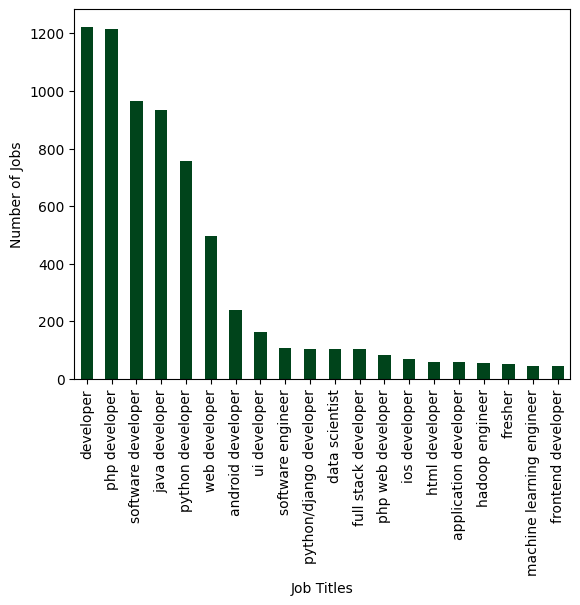

In [521]:
resume['Resume_title'].value_counts()[:20].plot(cmap='Greens_r',kind='bar')
plt.xlabel("Job Titles")
#plt.xticks(rotation=0)
plt.ylabel("Number of Jobs")

## We notice that major portion of resumes are from IT sector in my database. 
Its assumed that bias is towards IT jobs and data is skewed.


Due to less data for non-IT resumes/ jobs, model will not get trained well and produce good results for non-IT jobs.
So, I will use IT jobs / resumes for demo purposes. 

In [522]:
resume['Resume_title'].nunique()

4520

In [523]:
resume.reset_index(inplace=True)

In [524]:
resume['resume_id']= resume.index

In [525]:
resume_temp4 = resume.copy()
resume_temp4.to_csv('resume_sorted4.csv', index=False)

In [526]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14798 entries, 0 to 14797
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   14798 non-null  int64 
 1   Resume_title            14798 non-null  object
 2   City                    14798 non-null  object
 3   State                   14798 non-null  object
 4   Description             14798 non-null  object
 5   work_experiences        14798 non-null  object
 6   Educations              14798 non-null  object
 7   Skills                  14798 non-null  object
 8   Links                   14798 non-null  object
 9   Certificates            14798 non-null  object
 10  Additional Information  14798 non-null  object
 11  total_experience        14798 non-null  int32 
 12  experience_range        14798 non-null  int64 
 13  is_grad                 14798 non-null  int32 
 14  is_postgrad             14798 non-null  int32 
 15  is

##########################################################################################################################

## d. City / State

### Very important feature, as at some point I might need to filter down to jobs for location matching the resume location. 

There were multiple discrepancies observed in State / City column.

* Like some city, states, pincodes, nulls. I have to ensure one common format
* For any missing/ number values, I choose to make it generic with India with code 1

**So I decided to:**
* get all cities
* map to respective states
* provide them uniques location code (to match with job location). 
**Challenge** - Location code should be same in job and resume dataset to make sense and match properly. 


## Created following datasets, and use the same for both datasets (resume and job)
* **India-state-city dataset** used in jobs dataset. In resume, we are provided with States
* **State - State-id dataset**



########################################################################################################################

In [527]:
# reading my sorted resume csv
resume = pd.read_csv('resume_sorted4.csv')

In [528]:
resume['City'].value_counts()

City
Bengaluru        2044
NONE             1791
Pune             1571
Hyderabad        1347
Mumbai            747
                 ... 
Cochin              1
Morinda             1
Porbandar           1
Arvi                1
Papparappatti       1
Name: count, Length: 801, dtype: int64

### Renaming State to location - to match with jobs. 

In [529]:
resume.rename(columns={'State': 'location'}, inplace=True)
resume['location'].value_counts()

location
 Maharashtra    3044
 Karnataka      2174
NONE            1791
 Telangana      1374
 Tamil Nadu     1285
                ... 
 Bengaluru         1
 GA                1
 NE                1
 MD                1
 UAE               1
Name: count, Length: 79, dtype: int64

In [530]:
resume['location'] = resume['location'].str.strip()

### Read and used 'State' dataset to get unique state ids to match with jobs. Common dataset has to be used so that ids remain same.

In [531]:
# reading self-created data-set for states
state = pd.read_csv('state.csv')

In [532]:
state['State'] =state['State'].str.lower()

In [533]:
#creating state dict
state_dict = pd.Series(state.State_id.values,index=state.State).to_dict()

In [534]:
state_dict

{'india': 1,
 'andaman & nicobar islands': 2,
 'andhra pradesh': 2,
 'arunachal pradesh': 3,
 'assam': 4,
 'bihar': 5,
 'chhattisgarh': 6,
 'dadra & nagar haveli': 7,
 'daman & diu': 8,
 'delhi': 9,
 'goa': 10,
 'gujarat': 11,
 'haryana': 12,
 'himachal pradesh': 13,
 'jammu & kashmir': 14,
 'jharkhand': 15,
 'karnataka': 16,
 'kerala': 17,
 'lakshadweep': 18,
 'madhya pradesh': 19,
 'maharashtra': 20,
 'manipur': 21,
 'meghalaya': 22,
 'mizoram': 23,
 'nagaland': 24,
 'orissa': 25,
 'pondicherry': 26,
 'punjab': 27,
 'rajasthan': 28,
 'sikkim': 29,
 'tamil nadu': 30,
 'uttar pradesh': 31,
 'uttarakhand': 32,
 'west bengal': 33}

In [535]:
resume.head()

,index,Resume_title,City,location,Description,work_experiences,Educations,Skills,Links,Certificates,...,is_postgrad,is_doc,edu_unknown,Computer_Eng,Finance,HR,AI_stats,MBA,Other_specialization,resume_id
0,0,java developer,Tirur,Kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",...,0,0,0,1,0,0,0,0,0,0
1,1,software developer,Bengaluru,Karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},...,1,0,0,1,0,0,0,0,0,1
2,2,java developer,Pune,Maharashtra,Looking for a challenging career which demands...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},...,0,0,0,1,0,0,0,0,0,2
3,3,seeking innovative and challenging career assi...,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},...,0,0,0,1,0,0,0,0,0,3
4,4,java developer,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},...,0,0,0,1,0,0,0,0,0,4


In [536]:
resume['location']

0             Kerala
1          Karnataka
2        Maharashtra
3        Maharashtra
4        Maharashtra
            ...     
14793         Kerala
14794           NONE
14795    West Bengal
14796           NONE
14797    West Bengal
Name: location, Length: 14798, dtype: object

In [537]:
# Finally replaced locations as states ids
resume['location'] = resume['location'].str.lower()
resume['location'] = resume['location'].replace(state_dict)
#resume['loc_id'] = resume['location'].map(state_dict)

In [538]:
resume['location'].unique()

array([17, 16, 20, 'telangana', 31, 27, 'none', 9, 'in', 12, 2, 5, 19, 32,
       30, 11, 15, 28, 13, 25, 'chandigarh', 'chennai', 'telangana.',
       'mo', 33, 'puducherry', 4, 6, 'sharjah', 'new delhi',
       'jammu and kashmir', 10, 'tx', 'tripura', 'california', 22,
       'switzerland', 'united arab emirates', 'france', 'canada',
       'development', 'ct', 'pa', 'va', 'fl', 'mumbai', 'cyprus', 'ny',
       'germany', 'pitampura', 'il', 'bengaluru', 'ga', 'ca',
       'dadra and nagar haveli', 'ne', 'md', 'pallikaranai',
       'navi mumbai', 'wi', 'tamilnadu', 'mn', 'nj', 21, 'wisconsin',
       'pune', 'oh', 'nc', 'ar', 'de', 'qatar', 'oman', 'uae'],
      dtype=object)

#### I have got location ids here. But for reporting purposes I would still need State name. Adding loc name as state name from state dict.

In [539]:
resume['location'].value_counts()

location
20            3044
16            2174
none          1791
telangana     1374
30            1285
              ... 
canada           1
france           1
california       1
telangana.       1
uae              1
Name: count, Length: 73, dtype: int64

In [540]:
#creating city state dict
state_dict_1 = pd.Series(state.State.values,index=state.State_id).to_dict()

In [541]:
state_dict_1

{1: 'india',
 2: 'andhra pradesh',
 3: 'arunachal pradesh',
 4: 'assam',
 5: 'bihar',
 6: 'chhattisgarh',
 7: 'dadra & nagar haveli',
 8: 'daman & diu',
 9: 'delhi',
 10: 'goa',
 11: 'gujarat',
 12: 'haryana',
 13: 'himachal pradesh',
 14: 'jammu & kashmir',
 15: 'jharkhand',
 16: 'karnataka',
 17: 'kerala',
 18: 'lakshadweep',
 19: 'madhya pradesh',
 20: 'maharashtra',
 21: 'manipur',
 22: 'meghalaya',
 23: 'mizoram',
 24: 'nagaland',
 25: 'orissa',
 26: 'pondicherry',
 27: 'punjab',
 28: 'rajasthan',
 29: 'sikkim',
 30: 'tamil nadu',
 31: 'uttar pradesh',
 32: 'uttarakhand',
 33: 'west bengal'}

In [542]:
resume['loc_name'] = resume['location'].map(state_dict_1)

In [543]:
resume['loc_name']

0             kerala
1          karnataka
2        maharashtra
3        maharashtra
4        maharashtra
            ...     
14793         kerala
14794            NaN
14795    west bengal
14796            NaN
14797    west bengal
Name: loc_name, Length: 14798, dtype: object

In [544]:
resume.loc[resume['location'] == 'none', 'location'] = 1
resume['location']=resume['location'].replace(regex='([a-zA-Z])', value=0)
resume['loc_name'].fillna('india' , inplace = True) 

In [545]:
resume['loc_name'].value_counts()

loc_name
india               3450
maharashtra         3044
karnataka           2174
tamil nadu          1285
uttar pradesh        915
delhi                693
kerala               594
gujarat              514
west bengal          397
haryana              363
madhya pradesh       348
andhra pradesh       297
rajasthan            209
punjab               202
bihar                 72
orissa                66
uttarakhand           41
chhattisgarh          38
jharkhand             35
assam                 22
goa                   20
himachal pradesh      13
meghalaya              4
manipur                2
Name: count, dtype: int64

In [546]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14798 entries, 0 to 14797
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   14798 non-null  int64 
 1   Resume_title            14798 non-null  object
 2   City                    14798 non-null  object
 3   location                14798 non-null  int64 
 4   Description             14798 non-null  object
 5   work_experiences        14798 non-null  object
 6   Educations              14798 non-null  object
 7   Skills                  14798 non-null  object
 8   Links                   14798 non-null  object
 9   Certificates            14798 non-null  object
 10  Additional Information  14798 non-null  object
 11  total_experience        14798 non-null  int64 
 12  experience_range        14798 non-null  int64 
 13  is_grad                 14798 non-null  int64 
 14  is_postgrad             14798 non-null  int64 
 15  is

Text(0, 0.5, 'Number of Resumes')

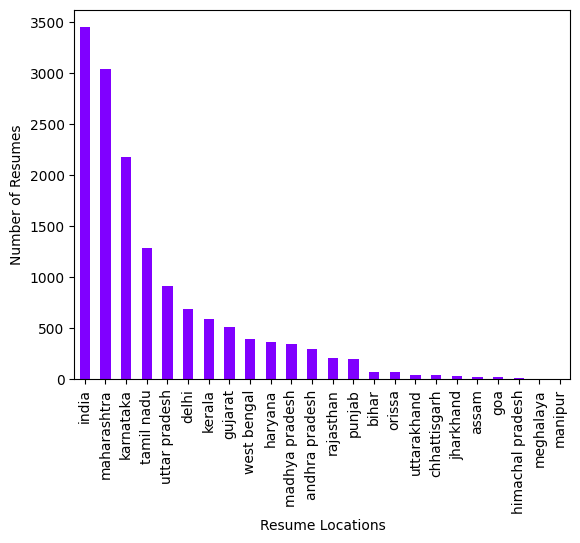

In [547]:
#studying the distribution
resume['loc_name'].value_counts().plot(cmap='rainbow',kind='bar')
plt.xlabel("Resume Locations")
#plt.xticks(rotation=0)
plt.ylabel("Number of Resumes")

In [548]:
# resume_temp4 = resume.copy()
# resume_temp4.to_csv('wip/resume_sorted4.csv', index=False)

##########################################################################################################################

## e. Skills


For now, decided to keep skills as is. Just lowering the str values.

##########################################################################################################################

In [549]:
# resume['Skills'].nunique()
resume['Skills'].value_counts()

Skills
['NONE']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1873
['HDFS', ' SQOOP', ' CLUSTERING', ' DATA MINING', ' DATA SCIENCE']                                                                                                                                                                                                      

In [550]:
resume['Skills']=resume['Skills'].str.lower()
resume['Skills']

0        ['java (less than 1 year)', ' jsp (less than 1...
1        ['programming languages: core java', ' j2ee \n...
2        ['eclipse (1 year)', ' hibernate', ' spring (l...
3        ['git', ' angular 7', ' maven', ' java', ' jen...
4        ['project: hr payroll systems role: java devel...
                               ...                        
14793    ['ms office (9 years)', ' aconex project manag...
14794                                             ['none']
14795    ['accounting', ' erp', ' tally', ' payroll', '...
14796    ['erp (2 years)', ' tally (5 years)', ' ms off...
14797    ['accounting', ' ecommerce', ' management acco...
Name: Skills, Length: 14798, dtype: object

##########################################################################################################################

## e. Description, certificates, links, Additional information


For now, decided to keep them as is. Will work on it as needed to match with Job descriptions.

##########################################################################################################################

In [551]:
t= resume.copy()
t.to_csv('resume_sorted_final3.csv', index=False)